# **Ex. 1 - First steps with scikit-learn**

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [142]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [144]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [145]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [146]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# **Ex. 2 - Modeling class probabilities via logistic regression**

### *Part 1 - Train a logistic regression model* (check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with scikit-learn: use C=100.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. 

Accuracy:  0.9777777777777777
MSE:  0.022222222222222223
R2:  0.9654907975460123


/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


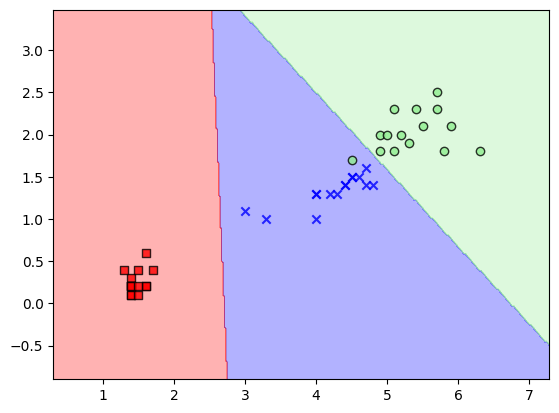

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train, y_train)

print('Accuracy: ', accuracy_score(lr.predict(X_test), y_test))
print('MSE: ',mean_squared_error(lr.predict(X_test), y_test))
print('R2: ', r2_score(lr.predict(X_test), y_test))

plot_decision_regions(X_test, y_test, lr)

### *Part 2 - Tackling overfitting via regularization*: evaluate different values for C (up to 100) and observe the accuracy difference between training and test sets. Plot the results.

Train accuracy:  0.9619047619047619
------------------- Test --------------------
Accuracy:  0.9777777777777777
MSE:  0.022222222222222223
R2:  0.9654907975460123


/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


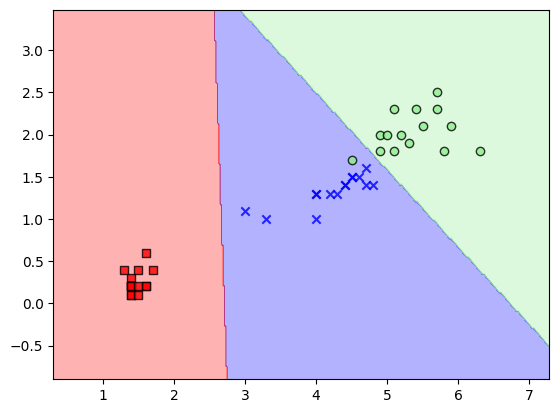

In [148]:
lr = LogisticRegression(C=50.0, random_state=1)
lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, lr)

print('Train accuracy: ', lr.score(X_train, y_train))

print('------------------- Test --------------------')

print('Accuracy: ', accuracy_score(lr.predict(X_test), y_test))
print('MSE: ',mean_squared_error(lr.predict(X_test), y_test))
print('R2: ', r2_score(lr.predict(X_test), y_test))

/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


Train accuracy:  0.9619047619047619
------------------- Test --------------------
Accuracy:  0.9777777777777777
MSE:  0.022222222222222223
R2:  0.9654907975460123


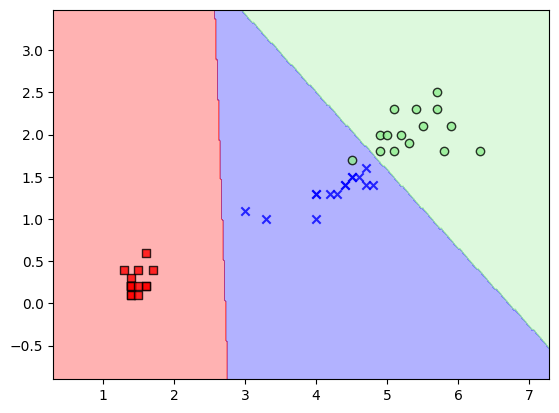

In [149]:
lr = LogisticRegression(C=25.0, random_state=1)
lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, lr)

print('Train accuracy: ', lr.score(X_train, y_train))

print('------------------- Test --------------------')

print('Accuracy: ', accuracy_score(lr.predict(X_test), y_test))
print('MSE: ',mean_squared_error(lr.predict(X_test), y_test))
print('R2: ', r2_score(lr.predict(X_test), y_test))

/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


Train accuracy:  0.9619047619047619
------------------- Test --------------------
Accuracy:  0.9777777777777777
MSE:  0.022222222222222223
R2:  0.9654907975460123


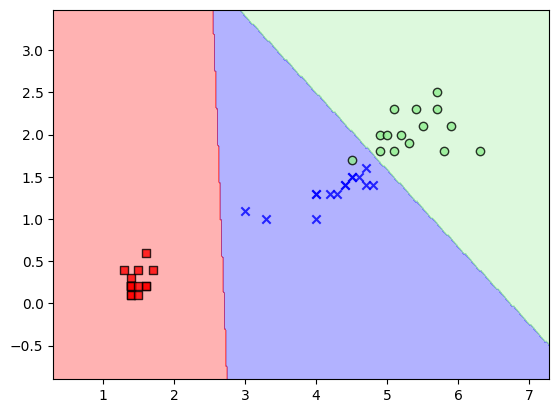

In [150]:
lr = LogisticRegression(C=75.0, random_state=1)
lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, lr)

print('Train accuracy: ', lr.score(X_train, y_train))

print('------------------- Test --------------------')

print('Accuracy: ', accuracy_score(lr.predict(X_test), y_test))
print('MSE: ',mean_squared_error(lr.predict(X_test), y_test))
print('R2: ', r2_score(lr.predict(X_test), y_test))

# **Ex. 3 - Maximum margin classification with support vector machines**

### *Part 1 - Dealing with the nonlinearly separable case using slack variables* (check linear kernel at https://scikit-learn.org/stable/modules/svm.html): use C=1.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


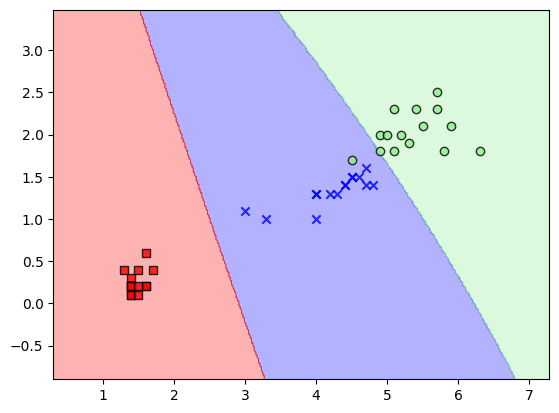

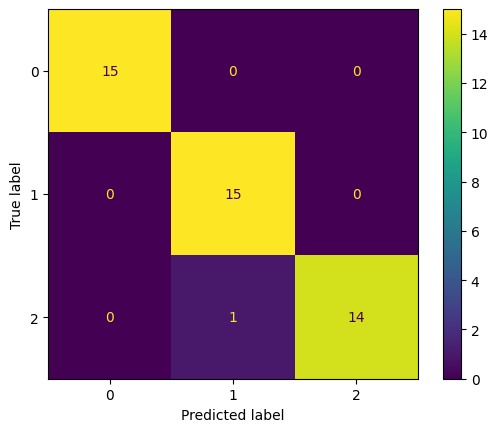

In [151]:
from sklearn import svm

clf = svm.SVC(C=1.0, random_state=1)
clf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf)

print(classification_report(y_test, clf.predict(X_test)))
cm = confusion_matrix(y_test, clf.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### *Part 2 - Using the kernel trick to find separating hyperplanes in higher dimensional space*: use kernel='rbf', C=1.0, gamma=0.2, and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. Compare and discuss the results with the previous case. Try different values for the kernel parameter and evaluate the results.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


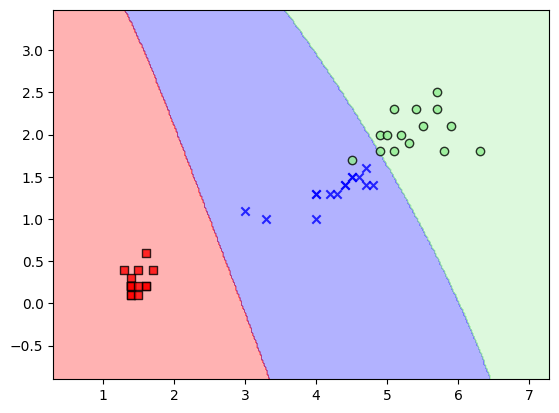

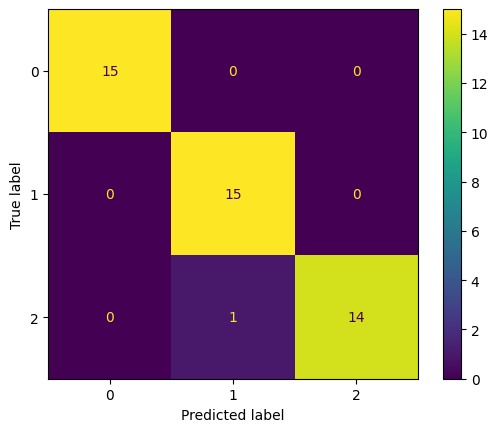

In [152]:
clf2 = svm.SVC(random_state=1, kernel='rbf', gamma=0.2)
clf2.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf2)

print(classification_report(y_test, clf2.predict(X_test)))
cm = confusion_matrix(y_test, clf2.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf2.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


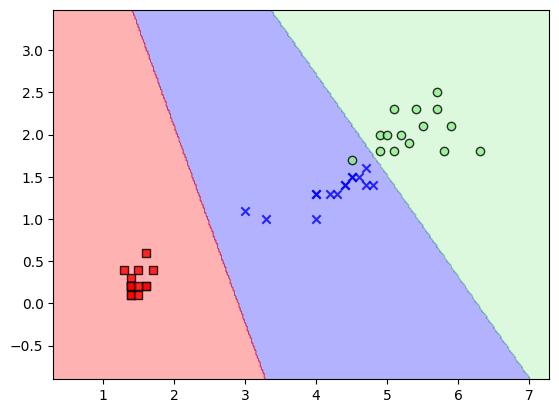

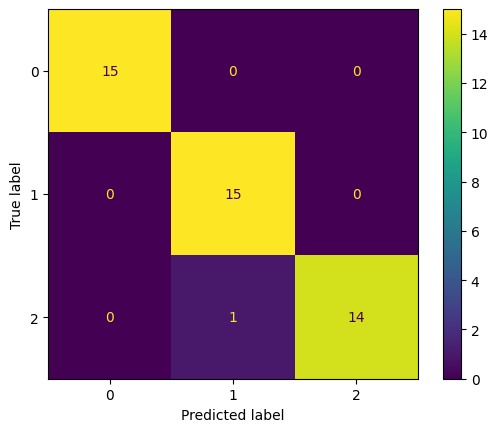

In [153]:
clf = svm.SVC(random_state=1, kernel='linear', gamma=0.2)
clf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf)

print(classification_report(y_test, clf.predict(X_test)))
cm = confusion_matrix(y_test, clf.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# **Ex. 4 - Decision tree learning**

### *Part 1 - Building a decision tree* (check https://scikit-learn.org/stable/modules/tree.html): use criterion='entropy', max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Try different values for the max_depth and check the result.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


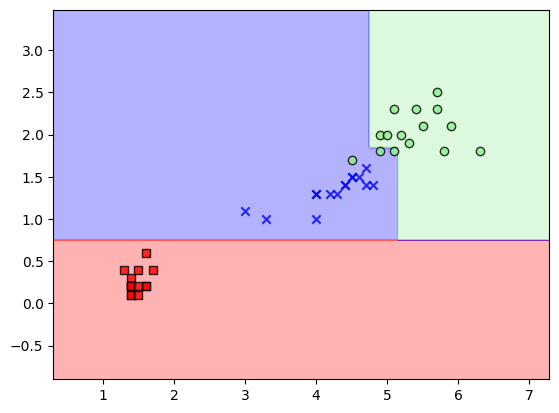

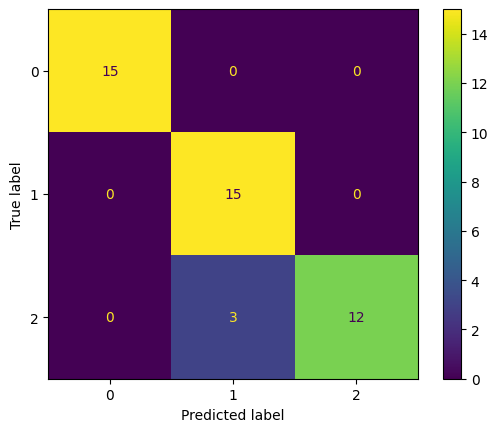

In [154]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
dt.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, dt)

print(classification_report(y_test, dt.predict(X_test)))
cm = confusion_matrix(y_test, dt.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

### *Part 2 - Combining weak to strong learners via random forests* (check https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): use criterion='entropy', n_estimators=25, max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Compare with the single tree case. Try different values for the number of trees and check the result.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


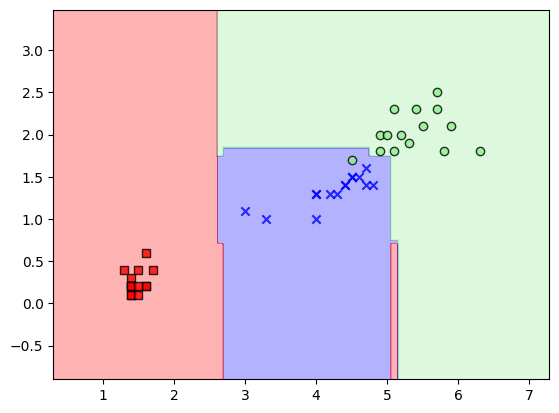

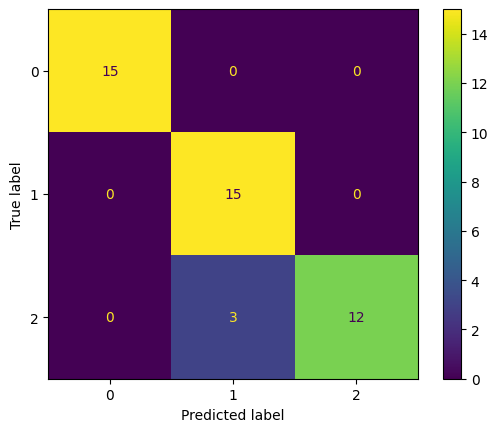

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=25, max_depth=4, random_state=1)
rf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, rf)

print(classification_report(y_test, dt.predict(X_test)))
cm = confusion_matrix(y_test, dt.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


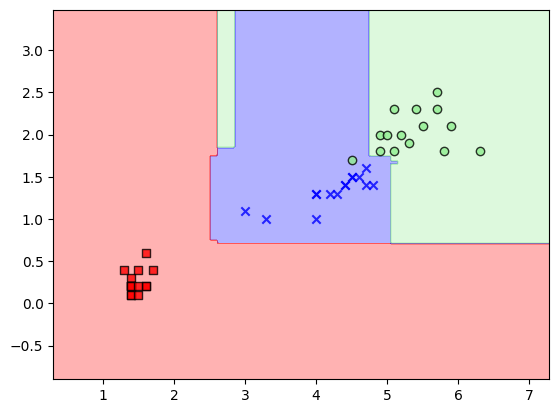

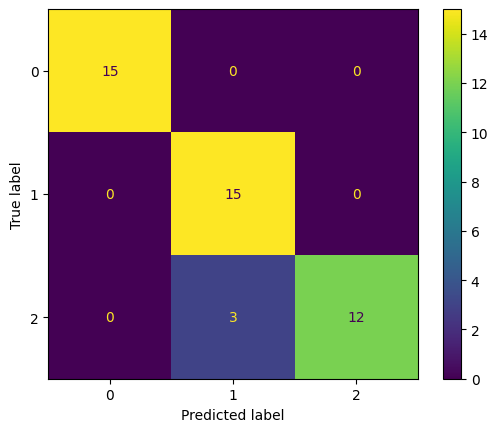

In [156]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=4, random_state=1)
rf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, rf)

print(classification_report(y_test, dt.predict(X_test)))
cm = confusion_matrix(y_test, dt.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


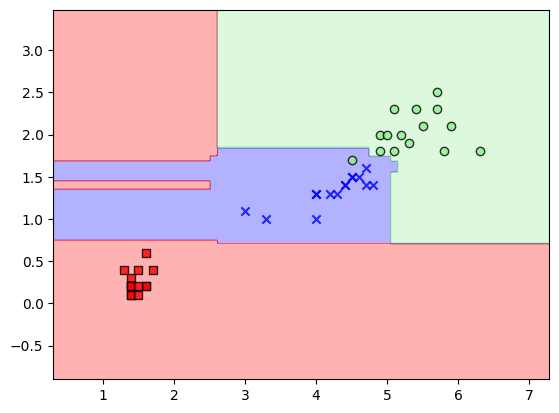

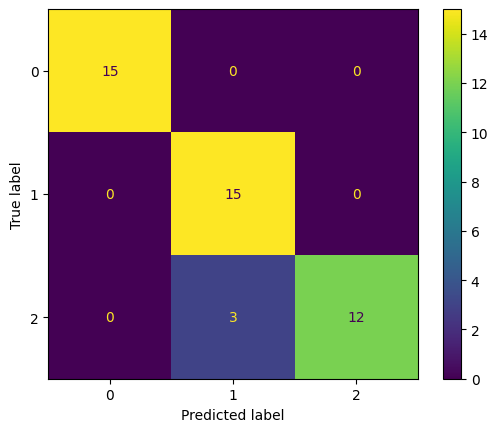

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=75, max_depth=4, random_state=1)
rf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, rf)

print(classification_report(y_test, dt.predict(X_test)))
cm = confusion_matrix(y_test, dt.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


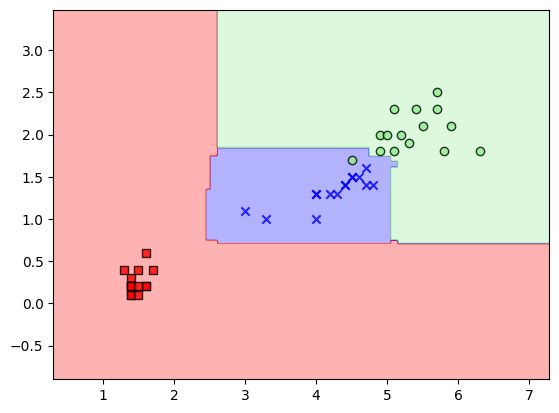

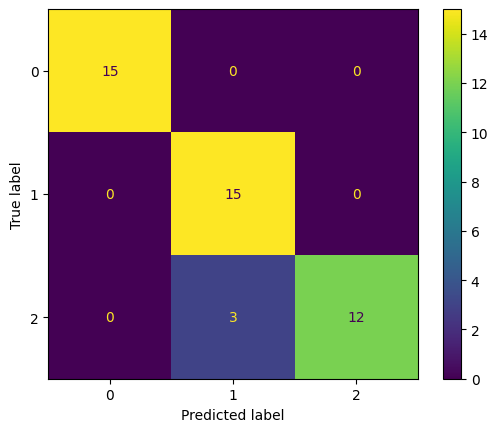

In [158]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=4, random_state=1)
rf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, rf)

print(classification_report(y_test, dt.predict(X_test)))
cm = confusion_matrix(y_test, dt.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



/tmp/ipykernel_8766/1854457290.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


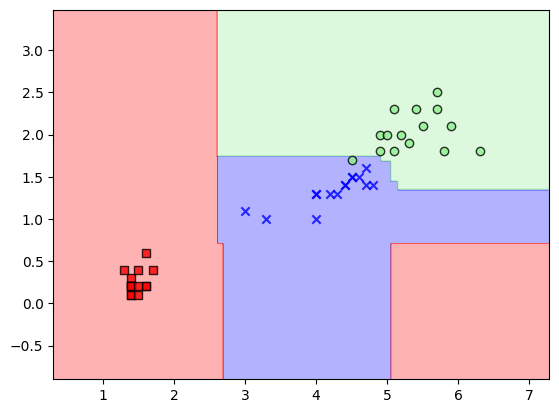

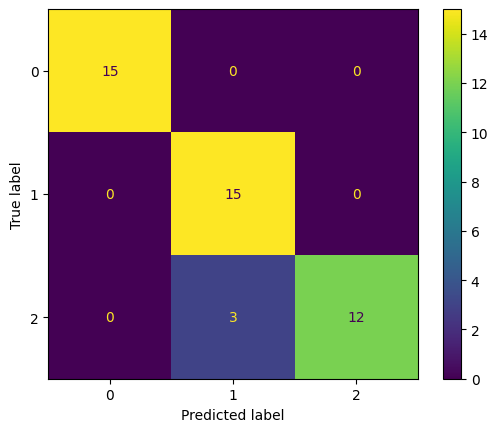

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=5, max_depth=4, random_state=1)
rf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, rf)

print(classification_report(y_test, dt.predict(X_test)))
cm = confusion_matrix(y_test, dt.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()